## 2. Displaying a Well Plot with MatPlotLib

Created by: Andy McDonald

The following tutorial illustrates displaying well data from a CSV on a custom matplotlib plot.

### Loading Well Data from CSV

The following cells load data in from a CSV file and replace the null values (-999.25) with Not a Number (NaN) values. More detail can be found in 1. Loading and Displaying Well Data From CSV.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
well = pd.read_csv("data/L0509WellData.csv", header=1)

In [3]:
well.replace(-999.25, np.nan, inplace=True)

In [4]:
well.describe()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
count,47988.000000,47974.000000,21709.000000,2075.000000,2075.000000,3095.000000
mean,2480.350176,36.018526,68.421113,2.563334,0.017502,0.163118
std,1385.308778,23.166559,5.695408,0.121987,0.045110,0.079184
min,81.000000,12.019911,45.813599,1.947107,-0.132031,0.033476
25%,1280.675200,22.705840,67.387177,2.499617,-0.015359,0.100890
50%,2480.350400,29.765934,68.658997,2.570223,0.002509,0.130982
75%,3680.025400,37.515741,69.358810,2.660643,0.048985,0.229602
max,4879.700600,218.201477,120.170410,2.788836,0.134148,0.417384


### Setting up the logplot

In [39]:
plt.rcParams["figure.figsize"] = (15,15) #Sets the inline plotsize within Jupyter Notebook

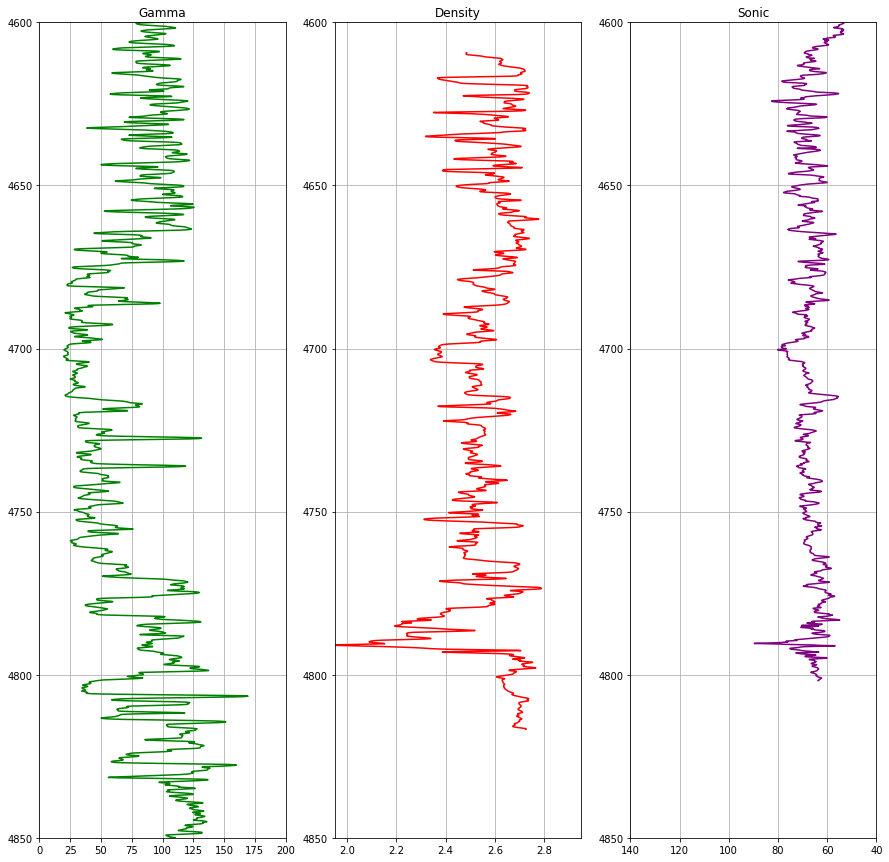

In [54]:
#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_title("Gamma")
ax1.set_xlim(0, 200)
ax1.set_ylim(4850, 4600)
ax1.grid()

ax2.plot("RHOB", "DEPTH", data = well, color = "red")
ax2.set_title("Density")
ax2.set_xlim(1.95, 2.95)
ax2.set_ylim(4850, 4600)
ax2.grid()

ax3.plot("DT", "DEPTH", data = well, color = "purple")
ax3.set_title("Sonic")
ax3.set_xlim(140, 40)
ax3.set_ylim(4850, 4600)
ax3.grid()


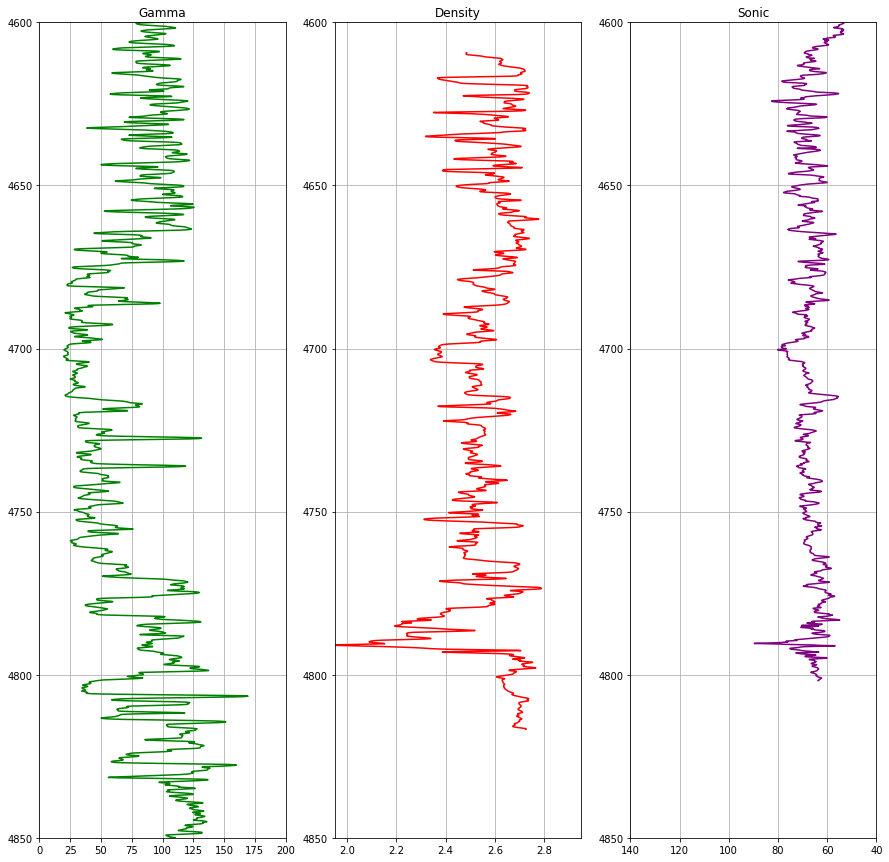

In [57]:
#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_title("Gamma")
ax1.set_xlim(0, 200)

ax2.plot("RHOB", "DEPTH", data = well, color = "red")
ax2.set_title("Density")
ax2.set_xlim(1.95, 2.95)

ax3.plot("DT", "DEPTH", data = well, color = "purple")
ax3.set_title("Sonic")
ax3.set_xlim(140, 40)

#Common functions for setting up the plot can be extracted into
#a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(4850, 4600)
    ax.grid()

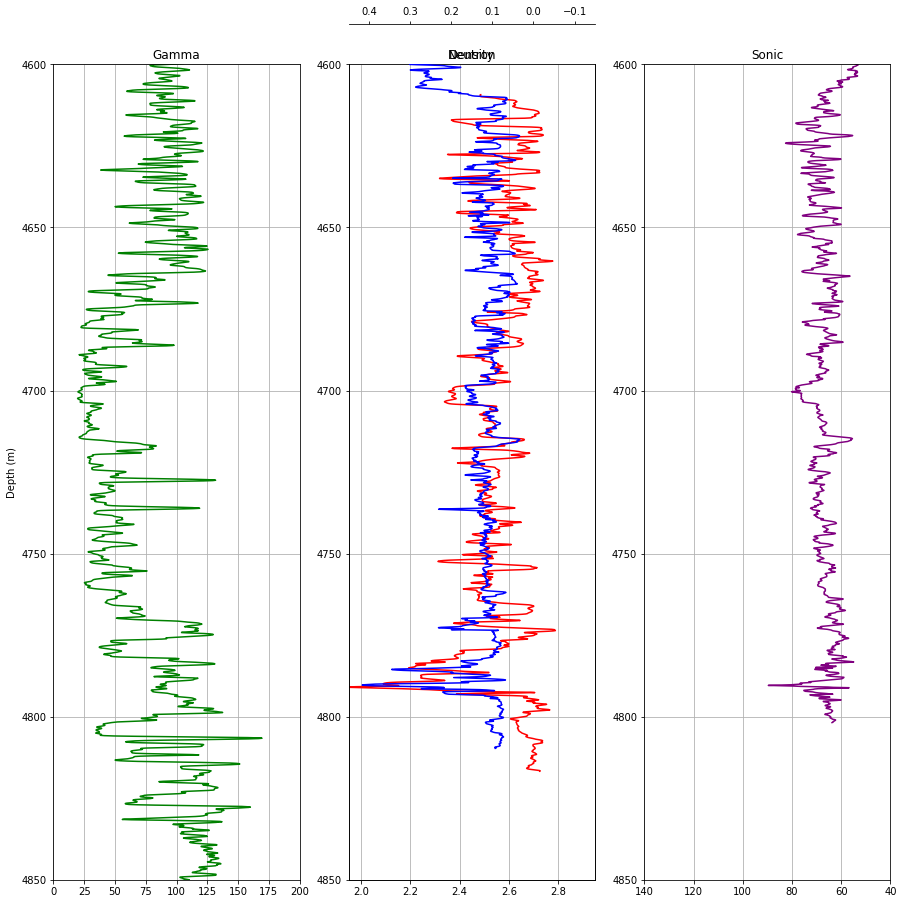

In [79]:
#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)
ax4 = ax2.twiny() #Twins the y-axis for the density track with the neutron track


ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_title("Gamma")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")

ax2.plot("RHOB", "DEPTH", data = well, color = "red")
ax2.set_title("Density")
ax2.set_xlim(1.95, 2.95)


ax3.plot("DT", "DEPTH", data = well, color = "purple")
ax3.set_title("Sonic")
ax3.set_xlim(140, 40)

ax4.plot("NPHI", "DEPTH", data = well, color = "blue")
ax4.set_title("Neutron")
ax4.set_xlim(0.45, -0.15)
ax4.set_ylim(4850, 4600)
ax4.spines["top"].set_position(("axes", 1.05))

#Common functions for setting up the plot can be extracted into
#a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(4850, 4600)
    ax.grid()

### Plotting data in scatter plots (Crossplots)

### Plotting histograms